In [61]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import Bunch

from skimage.io import imread
from skimage.transform import resize

In [62]:
def load_image_file(container_path, dimension = (64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    descr = '''Categorize the dataset based on the images
    Convert the image data into dimension of (64, 64)
    Total number of images is = 1200
    
    Types of images = ['Dog_dalmatian', 'Soccer_ball', 'Sunflower']'''
    
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            #plt.imshow(img)
            #plt.show()
            img_resized = resize(img, dimension, anti_aliasing = True, mode = 'reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images,
                DESCR = descr)

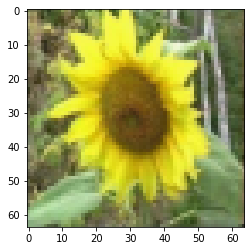

In [63]:
import skimage
activity_dataset = load_image_file('data/images')

In [64]:
x = activity_dataset.data
x[0:5]

array([[0.95903799, 0.95903799, 0.95903799, ..., 0.79916705, 0.79916705,
        0.79916705],
       [0.29794347, 0.34056373, 0.25603171, ..., 0.12303922, 0.13933824,
        0.17288986],
       [0.68854167, 0.1661152 , 0.22126225, ..., 0.66823108, 0.17714461,
        0.26188725],
       [0.98431373, 0.99215686, 0.98823529, ..., 0.98431373, 0.99215686,
        0.98823529],
       [0.12156863, 0.09803922, 0.1254902 , ..., 0.02251838, 0.01467525,
        0.01859681]])

In [65]:
y = activity_dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [67]:
x_train.shape

(164, 12288)

In [68]:
x_test.shape

(42, 12288)

In [69]:
y_train.shape

(164,)

In [70]:
y_test.shape

(42,)

In [71]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf', gamma = 'auto')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
y_test[0:5]

array([0, 0, 0, 0, 2])

In [73]:
y_pred = clf.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 2])

In [74]:
a_1 = clf.score(x_train, y_train)
a_1

0.7865853658536586

In [75]:
a_2 = clf.score(x_test, y_test)
a_2

0.8333333333333334

In [76]:
a_3 = clf.score(x_test, y_pred)
a_3

1.0

In [77]:
from sklearn.metrics import jaccard_similarity_score, accuracy_score, classification_report
a_4 = jaccard_similarity_score(y_test, y_pred)
a_4 

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8333333333333334

In [78]:
a_5 = accuracy_score(y_test, y_pred)
a_5

0.8333333333333334

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       1.00      0.50      0.67         8
           2       0.90      0.95      0.92        19

    accuracy                           0.83        42
   macro avg       0.87      0.77      0.79        42
weighted avg       0.86      0.83      0.83        42



In [80]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
regr.fit(x_train, y_train)

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_test[0:5]

array([0, 0, 0, 0, 2])

In [82]:
yhat = regr.predict(x_test)
yhat[0:5]

array([1, 0, 0, 0, 2])

In [83]:
b_1 = regr.score(x_train, y_train)
b_1

1.0

In [84]:
b_2 = regr.score(x_test, y_test)
b_2

0.7619047619047619

In [85]:
b_3 = regr.score(x_test, yhat)
b_3

1.0

In [86]:
b_4 = jaccard_similarity_score(y_test, yhat)
b_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7619047619047619

In [87]:
b_5 = accuracy_score(y_test, yhat)
b_5

0.7619047619047619

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [89]:
y_test[:10]

array([0, 0, 0, 0, 2, 1, 2, 0, 1, 0])

In [90]:
ypred_1 = knn.predict(x_test)
ypred_1[0:10]

array([1, 0, 1, 0, 2, 0, 2, 1, 1, 0])

In [91]:
c_1 = knn.score(x_train, y_train)
c_1

1.0

In [92]:
c_2 = knn.score(x_test, y_test)
c_2

0.6666666666666666

In [93]:
c_3 = knn.score(x_test, ypred_1)
c_3

1.0

In [94]:
c_4 = jaccard_similarity_score(y_test, ypred_1)
c_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6666666666666666

In [95]:
c_5 = accuracy_score(y_test, ypred_1)
c_5

0.6666666666666666

In [96]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
y_test[0:10]

array([0, 0, 0, 0, 2, 1, 2, 0, 1, 0])

In [98]:
yhat_1 = dt.predict(x_test)
yhat_1[0:10]

array([0, 0, 0, 0, 2, 1, 0, 0, 1, 0])

In [99]:
d_1 = dt.score(x_train, y_train)
d_1

1.0

In [100]:
d_2 = dt.score(x_test, y_test)
d_2

0.8571428571428571

In [101]:
d_3 = dt.score(x_test, yhat_1)
d_3

1.0

In [102]:
d_4 = jaccard_similarity_score(y_test, yhat_1)
d_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8571428571428571

In [103]:
d_5 = accuracy_score(y_test, yhat_1)
d_5

0.8571428571428571

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_test[0:10]

array([0, 0, 0, 0, 2, 1, 2, 0, 1, 0])

In [106]:
ypred_2 = rf.predict(x_test)
ypred_2[:10]

array([0, 0, 0, 0, 2, 0, 1, 0, 1, 1])

In [107]:
e_1 = rf.score(x_train, y_train)
e_1

1.0

In [108]:
e_2 = rf.score(x_test, y_test)
e_2

0.8809523809523809

In [109]:
e_3 = rf.score(x_test, ypred_2)
e_3

1.0

In [110]:
e_4 = jaccard_similarity_score(y_test, ypred_2)
e_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8809523809523809

In [111]:
e_5 = accuracy_score(y_test, ypred_2)
e_5

0.8809523809523809

In [112]:
from sklearn.naive_bayes import MultinomialNB
mul = MultinomialNB()
mul.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
y_test[0:10]

array([0, 0, 0, 0, 2, 1, 2, 0, 1, 0])

In [114]:
yhat_2 = mul.predict(x_test)
yhat_2[0:10]

array([1, 0, 1, 0, 2, 0, 0, 0, 1, 1])

In [115]:
f_1 = mul.score(x_train, y_train)
f_1

0.8048780487804879

In [116]:
f_2 = mul.score(x_test, y_test)
f_2

0.7619047619047619

In [117]:
f_3 = mul.score(x_test, yhat_2)
f_3

1.0

In [118]:
f_4 = jaccard_similarity_score(y_test, yhat_2)
f_4

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7619047619047619

In [119]:
f_5 = accuracy_score(y_test, yhat_2)
f_5

0.7619047619047619

In [ ]:
df = pd.DataFrame({'Training Score' : [a_1, b_1, c_1, d_1, e_1, f_1],
                  'Testing Score' : [a_2, b_2, c_2, d_2, e_2, f_2],
                  'Predicted Score' : [a_3, b_3, c_3, d_3, e_3, f_3],
                  'Accuracy Score' : [a_4, b_4, c_4, d_4, e_4, f_4],
                  'Jaccard Similarity Score' : [a_5, b_5, c_5, d_5, e_5, f_5]}, index = ['SVM', 'Logistic', 'KNN', 'Decision Tree', 'Random_Forest', 'MultinomialNB'])
df